# Benchmark: Centroid computation

Benchmark comparing Minimum Bounding Rectangle computation across:

* [georust/geo](https://lib.rs/crates/geo) crate
* The [geos C library](https://trac.osgeo.org/geos/), used through high-level Rust bindings via the [geos](https://lib.rs/crates/geos) crate

## Benchmarked operation

Each iteration computes the centroid of the multi-polygon representing all districts of India a 100,000 times.

# Prerequisites

Generate data:

```sh
cd harness
cargo run --release --bin benchmark_centroid -- --out-file ../analysis/benchmark_centroid/data.json --geojson-file ../data/india_districts/polbnda_ind.geojson --headlong --iterations 60
```

### Loading data from /mnt/data/source/explore-georust/analysis/benchmark_centroid/data.json
### Statistics: Raw data
                  qps            
program           geo        geos
count       90.000000   90.000000
mean     39089.720994  487.069346
std      12696.214044  106.718195
min       6620.703141  302.458663
25%      43552.452781  454.294259
50%      44130.697018  457.130410
75%      45405.639328  483.806501
max      46049.617450  946.092519


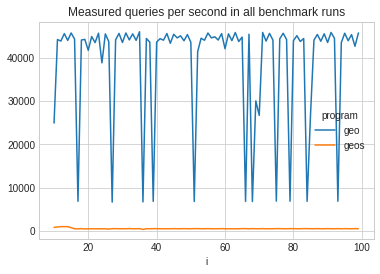

### Statistics: After outlier removal
                  qps            
program           geo        geos
count       73.000000   73.000000
mean     43768.217432  460.211697
std       3533.293293   17.842214
min      26697.525446  378.673789
25%      43802.663395  454.049895
50%      44352.115168  456.082628
75%      45478.704983  481.173811
max      46049.617450  486.068011


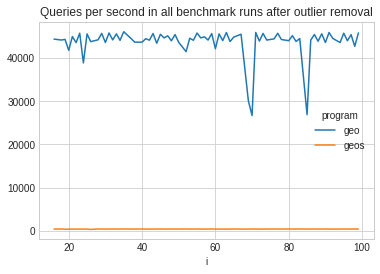

## Ratio of qps compared to geo
               qps
program       geos
count    73.000000
mean      0.010614
std       0.001321
min       0.008652
25%       0.010027
50%       0.010325
75%       0.010699
max       0.017119


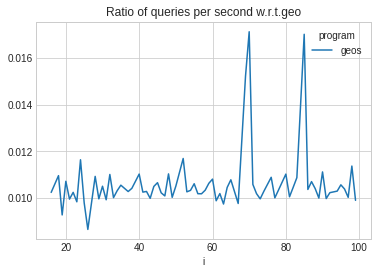

In [1]:
import os
data_absolute_path = os.path.join(os.getcwd(), 'data.json')
%run ../common/benchmark_analysis.ipynb

# Performance benchmarking

To generate the following SVG:

```bash
cd harness
cargo build --release

perf record -F 100 -g --call-graph dwarf -o ../analysis/benchmark_centroid/perf.data -- ./target/release/benchmark_centroid --geojson-file ../data/india_districts/polbnda_ind.geojson --out-file /dev/null --iterations 10 --headlong >/dev/null

cd ../analysis/benchmark_centroid
perf script -i perf.data | ../../third_party/stackcollapse-perf.pl > perf.collapsed-stacks.data
../../third_party/flamegraph.pl perf.collapsed-stacks.data > perf.svg
```

![](./perf.svg)

To dig in further, use
```
perf report -i perf.data --call-graph=fractal,0.5
```

# Vectors && sqrt

* most of the overhead in geos is from slower vector indexing operator compared to rust iterators
* A sizable percent is due to sqrt in distance computation -- the algorithm in geo avoids this entirely.

![](./geo_centroid.png)
![](./geos_centroid.png)